## World Happiness Report 2023 - EDA

## 2K22/CSE/55

## Data Science Assigment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**World Happiness Report 2023 Dataset**

In [2]:
WHR_df = pd.read_csv("world Happiness Report 2023.csv")
WHR_df.head(4)

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861


**Filter the columns and copy only the ones that will be used for analysis.**

In [3]:
columns = ['Country name', 'iso alpha', 'Regional indicator', 'Happiness score', 
           'Logged GDP per capita', 'Social support',
           'Healthy life expectancy', 'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
happy_df = WHR_df[columns].copy()
happy_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


**Convert all column names to uppercase**

In [4]:
happy_df.columns = happy_df.columns.str.upper()
happy_df.head()

,COUNTRY NAME,ISO ALPHA,REGIONAL INDICATOR,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


## Data info

In [5]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   COUNTRY NAME                  137 non-null    object 
 1   ISO ALPHA                     137 non-null    object 
 2   REGIONAL INDICATOR            137 non-null    object 
 3   HAPPINESS SCORE               137 non-null    float64
 4   LOGGED GDP PER CAPITA         137 non-null    float64
 5   SOCIAL SUPPORT                137 non-null    float64
 6   HEALTHY LIFE EXPECTANCY       136 non-null    float64
 7   FREEDOM TO MAKE LIFE CHOICES  137 non-null    float64
 8   GENEROSITY                    137 non-null    float64
 9   PERCEPTIONS OF CORRUPTION     137 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [6]:
# Check if there are any missing values
happy_df.isnull().sum()

COUNTRY NAME                    0
ISO ALPHA                       0
REGIONAL INDICATOR              0
HAPPINESS SCORE                 0
LOGGED GDP PER CAPITA           0
SOCIAL SUPPORT                  0
HEALTHY LIFE EXPECTANCY         1
FREEDOM TO MAKE LIFE CHOICES    0
GENEROSITY                      0
PERCEPTIONS OF CORRUPTION       0
dtype: int64

In [7]:
happy_df[happy_df.isnull().any(axis = 1)]

,COUNTRY NAME,ISO ALPHA,REGIONAL INDICATOR,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
116,State of Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


A missing value has been found in the "healthy life expectancy" column for the State of Palestine. It has been decided not to make any assumptions or fill in the missing value, as this could bias the information. Since the value is not provided in the report, it will be left as is. This decision will not impact the analysis, and the missing value has been noted for future reference.

In [8]:
# Choose the Numerical columns for further analysis
numerical_columns = ['HAPPINESS SCORE', 'LOGGED GDP PER CAPITA', 'SOCIAL SUPPORT',
                     'HEALTHY LIFE EXPECTANCY','FREEDOM TO MAKE LIFE CHOICES',
                     'GENEROSITY', 'PERCEPTIONS OF CORRUPTION']
happy_df[numerical_columns].describe()

,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


Outliers, which are data points that significantly differ from other observations, have been found in the distribution of "perceptions of corruption." However, it has been decided to include these outliers in the analysis. They might indicate the presence of exceptional or unusual situations in the country.

**Analysis of happiness score and other factors across different region..**

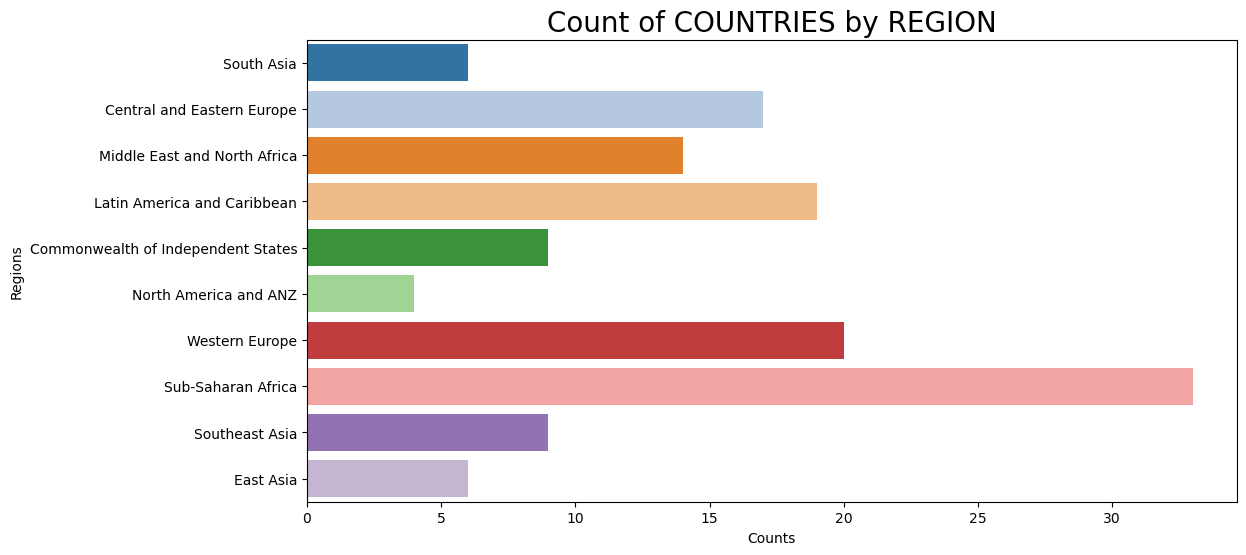

In [9]:
#Count of Countries by Region
fig = plt.figure(figsize = (12,6))
sns.countplot(happy_df, y = 'REGIONAL INDICATOR', palette = 'tab20')
plt.ylabel("Regions")
plt.xlabel("Counts")
plt.title("Count of COUNTRIES by REGION", size = 20)
plt.show()

**Top 15 happiest and least happy countries.**

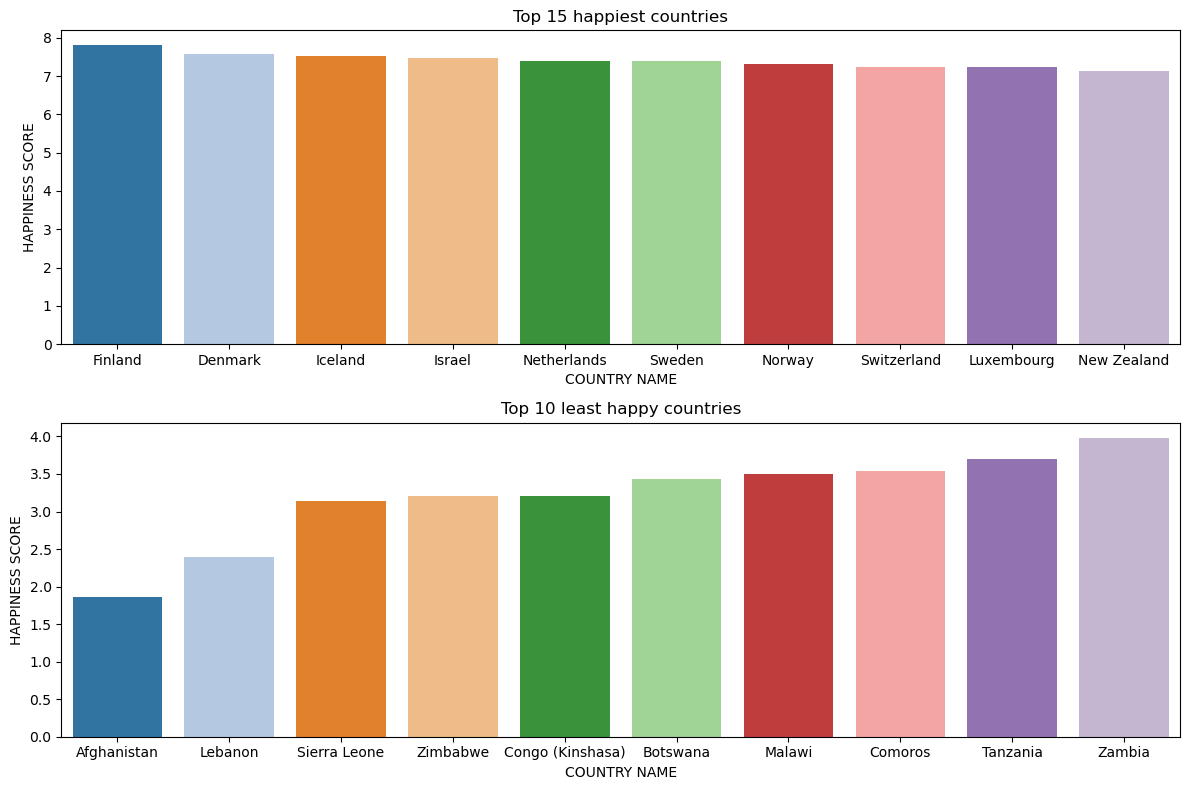

In [10]:
#A column chart was created to analyze the top 10 happiest and least happy countries.
top_10_happy_country = happy_df.sort_values('HAPPINESS SCORE', ascending = False)
bottom_10_happy_country = happy_df.sort_values('HAPPINESS SCORE', ascending = True)

fig, ax = plt.subplots(2, 1, figsize = (12,8))

sns.barplot(top_10_happy_country.iloc[:10], y = 'HAPPINESS SCORE',
            x = 'COUNTRY NAME', palette = 'tab20', ax = ax[0])
ax[0].set_title("Top 15 happiest countries")



sns.barplot(bottom_10_happy_country.iloc[:10], y = 'HAPPINESS SCORE',
            x = 'COUNTRY NAME', palette = 'tab20', ax = ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
fig.show()

-The analysis revealed that eight out of the top 10 happiest countries are from the Western Europe region.

-Similarly, the analysis of the top 10 least happy countries showed that eight out of 10 countries are from the Sub-Saharan Africa region.

## Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Select the independent variable (X) and the dependent variable (y)
X = top_10_happy_country[['LOGGED GDP PER CAPITA']]Ladder score in Dystopia
X = top_10_happy_country[['LOGGED GDP PER CAPITA']]Ladder score in Dystopia

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))